In [1]:
#!/usr/bin/env python
#DBR last updated 07/2019
#this code makes a bunch of plots of global analysis
#needs the df which is imported and can be remade using sa_global

%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st 
import sklearn.linear_model as slm 
import resource; resource.setrlimit(resource.RLIMIT_NOFILE, (1000,-1)) #allow many plots



In [2]:
sa_df=pd.read_csv('data/sa_df.csv').iloc[:, 1:] #print the csv for later analysis

sa_df.head()

,log10phi,f_r,log10x_50,A0,PE,fpvls_avg,fpvls_std,IC50s_avg,IC50s_std,dose
0,-0.519067,0.030984,1.586755,1.0,0.988636,6.096654,0.000000,1.69897,0.0,10.0
1,-0.089049,0.076860,1.287647,1.0,0.965909,4.627920,0.965111,1.69897,0.0,10.0
2,-0.559480,0.109877,1.184044,0.0,0.920455,5.224234,1.411772,1.69897,0.0,10.0
3,-0.433630,0.050762,1.608808,2.0,0.965909,4.212950,1.128564,1.69897,0.0,10.0
4,-0.182637,0.005829,1.162385,0.0,0.988636,5.727723,0.000000,1.69897,0.0,10.0


In [3]:
#labels etc for plots
trialcolz=['teal','tan']

short_outz_labels=['PE','mean VL1','std dev VL1','mean IC50','std dev IC50']
long_outz_labels=['prevention efficacy (%)',
                  'mean VL1 log10(copies/mL)',
                  'std dev VL1 log10(copies/mL)',
                  'mean IC50 log10($\mu$g/mL)',
                  'std dev IC50 log10($\mu$g/mL)']

short_varz_labels=[r'$\log_{10}\phi$',r'$f$',r'$\log_{10}x_{50}$',r'$A_0$']
long_varz_labels=[r'potency reduction factor, $\log_{10}\phi$',
                  r'resistant fraction, $f$',
                  r'maximum IC50 $\log_{10}x_{50}$',
                  r'initial number infected cells $A_0$']

#standardize limits/ticks
ytickz=[[0,0.25,0.5,0.75,1],
       [0,1,2,3,4,5,6,7],
       [1,2,3],
       [-1,0,1,2],
       [0,1,2]]

xtickz=[[0,1,2,3],
       [0,0.2,0.4,0.6,0.8,1],
       [2,3,4],
       [0,5,10,15,20]]

D=[10,30]
sa_v = ['log10phi','f_r','log10x_50','A0']
sa_o = ['PE','fpvls_avg','fpvls_std','IC50s_avg','IC50s_std']


In [4]:
#calculate correlation matrix
corrzlist=np.zeros([2,len(short_varz_labels),len(short_outz_labels)])
for v in range(len(sa_v)):
    for o in range(len(sa_o)):
        for iid in range(len(D)):

            tdf=sa_df[sa_df['dose']==D[iid]]
            
            x=np.array(tdf[sa_v[v]])
            y=np.array(tdf[sa_o[o]])
            
            x=x[~np.isnan(y)]
            y=y[~np.isnan(y)]
            
            corrz=st.pearsonr(x,y)            
            corrzlist[iid,v,o]=corrz[0] #pearson correlation coefficient

In [6]:
if False:
    #plot global analysis all panels separately
    for v in range(len(short_varz_labels)):
        for o in range(len(short_outz_labels)):
            plt.figure(figsize=(4,3))
            for iid in range(len(D)):
                tdf=sa_df[sa_df['dose']==D[iid]]

                x=np.array(tdf[sa_v[v]])
                y=np.array(tdf[sa_o[o]])

                x=x[~np.isnan(y)]
                y=y[~np.isnan(y)]

                plt.scatter(x,y,c=trialcolz[iid],s=120,alpha=0.8)

            plt.xlabel(short_varz_labels[v])
            plt.ylabel(short_outz_labels[o])

            plt.xlim([np.min(xtickz[v]),np.max(xtickz[v])])

            plt.yticks(ytickz[o])
            plt.xticks(xtickz[v])

            plt.tight_layout()
            plt.savefig('figures/global/var_'+str(v)+'outcome_'+str(o)+'.pdf',dpi=600)

    plt.close('all')

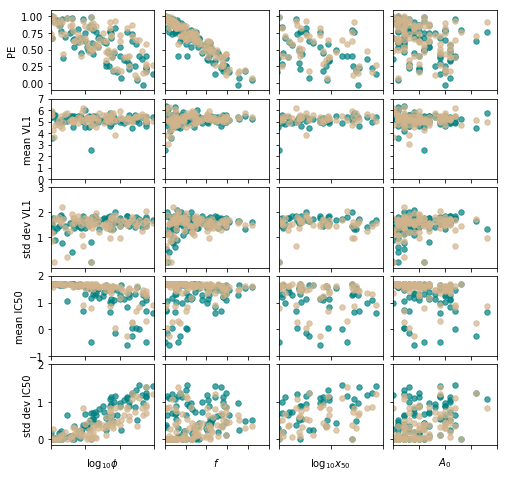

In [7]:
#plot all sa_variables against clinical endpoints

labels_on=True #flag for all together plot labels            

nx=len(short_varz_labels); ny=len(short_outz_labels);
fig,axarr=plt.subplots(ny,nx,sharey=False,sharex=False,
                       figsize=(8,8),
                       gridspec_kw={'wspace':0.1,'hspace':0.1})

for v in range(len(short_varz_labels)):
    for o in range(len(short_outz_labels)):  
        for iid in range(len(D)):

            tdf=sa_df[sa_df['dose']==D[iid]]
            
            x=np.array(tdf[sa_v[v]])
            y=np.array(tdf[sa_o[o]])
            
            x=x[~np.isnan(y)]
            y=y[~np.isnan(y)]
            
            ax=axarr[o][v]
            ax.scatter(x,y,c=trialcolz[iid],s=30,alpha=0.7)
            ax.set_xlim([np.min(xtickz[v]),np.max(xtickz[v])])

            ax.set_yticks(ytickz[o]);  
            ax.set_xticks(xtickz[v])
            if v!=0:
                ax.set_yticklabels([])
            if o!=len(short_outz_labels):
                ax.set_xticklabels([])
            
if labels_on:
    for v in range(len(short_varz_labels)):
        axarr[4][v].set_xlabel(short_varz_labels[v])
        
    for o in range(len(short_outz_labels)):  
        axarr[o][0].set_ylabel(short_outz_labels[o])

plt.savefig('figures/global/allcorrz.pdf',dpi=600)



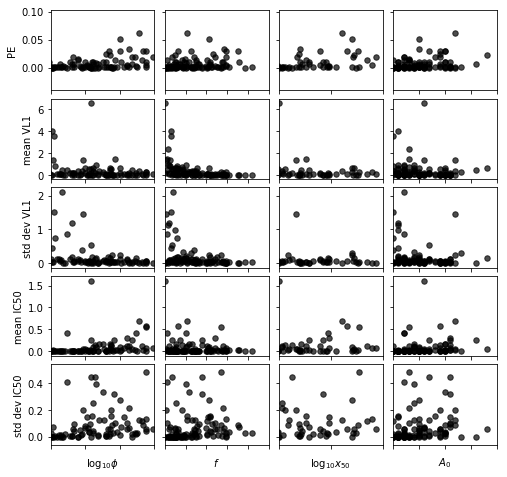

In [8]:
#all change in sa_variables by dose against clinical endpoints

labels_on=True #flag for all together plot labels            

nx=len(short_varz_labels); ny=len(short_outz_labels);
fig,axarr=plt.subplots(ny,nx,sharey=False,sharex=False,
                       figsize=(8,8),
                       gridspec_kw={'wspace':0.1,'hspace':0.1})

for v in range(len(short_varz_labels)):
    for o in range(len(short_outz_labels)):  
        oo=[]; xo=[]
        for iid in range(len(D)):

            tdf=sa_df[sa_df['dose']==D[iid]]
            
            x=np.array(tdf[sa_v[v]])
            y=np.array(tdf[sa_o[o]])
            
            #x=x[~np.isnan(y)]
            #y=y[~np.isnan(y)]
            
            xo.append(x)
            oo.append(y) #the list of outcomes for each dose

        ax=axarr[o][v]
        ax.scatter(xo[0],(oo[0]-oo[1])**2,c='k',s=30,alpha=0.7)
        ax.set_xlim([np.min(xtickz[v]),np.max(xtickz[v])])

        #ax.set_yticks(ytickz[o]);  
        ax.set_xticks(xtickz[v])
        if v!=0:
            ax.set_yticklabels([])
        if o!=len(short_outz_labels):
            ax.set_xticklabels([])
            
if labels_on:
    for v in range(len(short_varz_labels)):
        axarr[4][v].set_xlabel(short_varz_labels[v])
        
    for o in range(len(short_outz_labels)):  
        axarr[o][0].set_ylabel(short_outz_labels[o])

plt.savefig('figures/global/allcorrz-subtracted.pdf',dpi=600)



In [9]:
if False:
    #2 point correlation plots - skip redundant ones with "clever" for loop
    dose=10
    for o in range(len(short_outz_labels)):
        for v1 in range(len(short_varz_labels)):
            for vx in range(len(short_varz_labels)-v1-1):
                v2=vx+v1+1
                plt.figure(figsize=(4,3))

                tdf=sa_df[sa_df['dose']==dose]

                x=np.array(tdf[sa_v[v1]]); 
                y=np.array(tdf[sa_v[v2]]); 
                z=np.array(tdf[sa_o[o]])

                plt.scatter(x,y,c=z,s=120)            

                plt.xlabel(short_varz_labels[v1],fontsize=12)
                plt.ylabel(short_varz_labels[v2],fontsize=12)

                plt.xlim([np.min(xtickz[v1]),np.max(xtickz[v1])])
                plt.ylim([np.min(xtickz[v2]),np.max(xtickz[v2])])

                plt.xticks(xtickz[v1]);  plt.yticks(xtickz[v2])

                #legend
                cbar = plt.colorbar()
                #cbar.ax.set_yticklabels(ytickz[o])
                plt.title(short_outz_labels[o])#cbar.set_label(short_outz_labels[o], rotation=270)

                plt.tight_layout()
                plt.savefig('figures/global/var_2pt_'+str(v1)+str(v2)+'outcome_'+str(o)+'v'+str(v)+'.pdf',dpi=600)
    plt.close('all')

In [10]:
if False:
    #2 point correlation plots - skip redundant ones with "clever" for loop
    #as a an array of subplots!
    vmatlist=[1,4,7,5,8,9]
    for o in range(len(short_outz_labels)):
        plt.figure(figsize=(7,6))
        vind=1
        for v1 in range(len(short_varz_labels)):
            for vx in range(len(short_varz_labels)-v1-1):
                v2=vx+v1+1
                plt.subplot(3,3,vmatlist[vind-1])
                tdf=sa_df[sa_df['dose']==dose]

                x=np.array(tdf[sa_v[v1]]); 
                y=np.array(tdf[sa_v[v2]]); 
                z=np.array(tdf[sa_o[o]])

                plt.scatter(x,y,c=z,s=120)            

                plt.xlabel(short_varz_labels[v1],fontsize=10)
                plt.ylabel(short_varz_labels[v2],fontsize=10)

                plt.xlim([np.min(xtickz[v1]),np.max(xtickz[v1])])
                plt.ylim([np.min(xtickz[v2]),np.max(xtickz[v2])])

                plt.yticks(xtickz[v2])
                plt.xticks(xtickz[v1])

                vind+=1
        plt.subplot(331)
        plt.title(short_outz_labels[o])
        plt.colorbar()
        plt.tight_layout()
        plt.savefig('figures/global/all2pts_out'+str(o)+'v'+str(v)+'.pdf',dpi=600)
    plt.close('all')

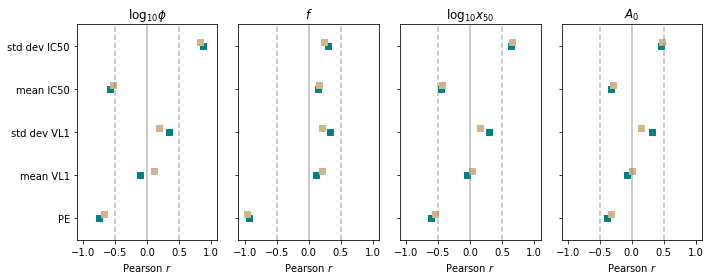

In [11]:
#scatter plots with all correlation coefficients
plt.figure(figsize=(10,4))
for ii in range(2):
    for v in range(len(short_varz_labels)):

        plt.subplot(1,4,v+1)

        #plt.barh(corrzlist[ii,v,:],np.arange(len(outcomes)),color=trialcolz[ii])
        plt.scatter(corrzlist[ii,v,:],np.arange(len(short_outz_labels))+ii/10,color=trialcolz[ii],s=30,marker='s')

        if v==0:
            plt.yticks(np.arange(len(short_outz_labels)),short_outz_labels)
        else:
            plt.yticks(np.arange(len(short_outz_labels)),'')

        plt.ylim([-0.5,len(short_outz_labels)-0.5])
        plt.xlim([-1.1,1.1])
        plt.title(short_varz_labels[v])

        plt.axvline(-0.5,ls='--',color='gray',alpha=0.3)
        plt.axvline(0.5,ls='--',color='gray',alpha=0.3)
        plt.axvline(0,ls='-',color='gray',alpha=0.3)
        plt.xticks(np.linspace(-1,1,5))
        plt.xlabel('Pearson $r$')

plt.tight_layout()
plt.savefig('figures/gsense_pearsonVARS.pdf',dpi=600)


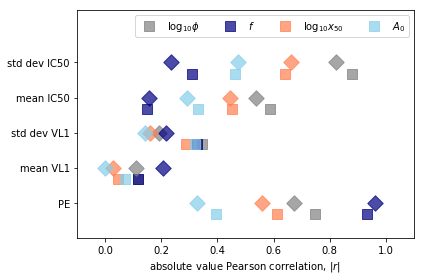

In [15]:
#scatter plot with all abs val correlation coefficients
colorz=['gray','navy','coral','skyblue']
plt.figure(figsize=(6,4))
markz=['s','D']
for iid in range(len(D)):
    for v in range(len(short_varz_labels)):
        plt.scatter(np.abs(corrzlist[iid,v,:]),np.arange(len(short_outz_labels))+iid/3-1/3,
                    color=colorz[v],s=120,marker=markz[iid],alpha=0.7)
        
plt.yticks(np.arange(len(short_outz_labels)),short_outz_labels)
plt.ylim([-1,len(short_outz_labels)+0.5])
plt.xlim([-0.1,1.1])

#plt.axvline(-0.5,ls='--',color='k')
#plt.axvline(0.5,ls='--',color='k')
plt.xlabel('absolute value Pearson correlation, $|r|$')
#plt.grid()
plt.legend(short_varz_labels,ncol=4)
plt.tight_layout()
plt.savefig('figures/gsense_pearsonALL.pdf',dpi=600)


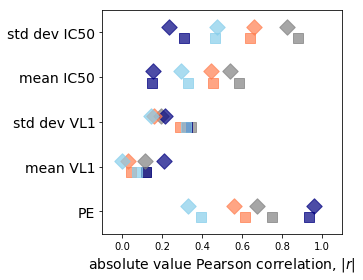

In [19]:
#scatter plot with all abs val correlation coefficients - no legend
plt.figure(figsize=(5,4))
for iid in range(len(D)):
    for v in range(len(short_varz_labels)):
        plt.scatter(np.abs(corrzlist[iid,v,:]),np.arange(len(short_outz_labels))+iid/4-1/8,
                    color=colorz[v],s=120,marker=markz[iid],alpha=0.7)
        
plt.yticks(np.arange(len(short_outz_labels)),short_outz_labels,fontsize=14)
plt.ylim([-0.5,len(short_outz_labels)-0.5])
plt.xlim([-0.1,1.1])
plt.xlabel('absolute value Pearson correlation, $|r|$',fontsize=14)
plt.tight_layout()
plt.savefig('figures/gsense_pearsonALL2.pdf',dpi=600)




In [20]:
if False:
    #2 point correlation plots THE OTHER WAY
    for v in range(len(short_varz_labels)):
        for o1 in range(len(short_outz_labels)):
            for ox in range(len(short_outz_labels)-o1-1):
                o2=ox+o1+1
                tdf=sa_df[sa_df['dose']==dose]

                x=np.array(tdf[sa_o[o1]]); 
                y=np.array(tdf[sa_o[o2]]); 
                z=np.array(tdf[sa_v[v]])

                plt.figure(figsize=(4,3))
                plt.scatter(x,y,c=z,s=120)            

                plt.xlabel(short_outz_labels[o1],fontsize=12)
                plt.ylabel(short_outz_labels[o2],fontsize=12)

                plt.xlim([np.min(ytickz[o1]),np.max(ytickz[o1])])
                plt.ylim([np.min(ytickz[o2]),np.max(ytickz[o2])])

                plt.xticks(ytickz[o1]); plt.yticks(ytickz[o2]); 

                #legend
                cbar = plt.colorbar()
                #cbar.ax.set_ylim([np.min(xtickz[v]),np.max(xtickz[v])])
                #cbar.ax.set_yticklabels(xtickz[v])
                plt.title(short_varz_labels[v])#cbar.set_label(short_outz_labels[o], rotation=270)

                plt.tight_layout()
                plt.savefig('figures/global/out_2pt_'+str(o1)+str(o2)+'var_'+str(v)+'.pdf',dpi=600)
    plt.close('all')

In [21]:
if False:
    #THE OTHER WAY
    #2 point correlation plots - skip redundant ones with "clever" for loop
    #as a an array of subplots!
    omatlist=[1,5,9,13,6,10,14,11,15,16]
    for v in range(len(short_varz_labels)):
        plt.figure(figsize=(10,8))
        oind=1
        for o1 in range(len(short_outz_labels)):
            for ox in range(len(short_outz_labels)-o1-1):
                o2=ox+o1+1
                plt.subplot(4,4,omatlist[oind-1])
                tdf=sa_df[sa_df['dose']==dose]

                x=np.array(tdf[sa_o[o1]]); 
                y=np.array(tdf[sa_o[o2]]); 
                z=np.array(tdf[sa_v[v]])

                plt.scatter(x,y,c=z,s=120)            

                plt.xlabel(short_outz_labels[o1],fontsize=10)
                plt.ylabel(short_outz_labels[o2],fontsize=10)

                plt.xlim([np.min(ytickz[o1]),np.max(ytickz[o1])])
                plt.ylim([np.min(ytickz[o2]),np.max(ytickz[o2])])

                plt.xticks(ytickz[o1]); plt.yticks(ytickz[o2]); 
                oind+=1

        plt.subplot(441)
        plt.title(short_varz_labels[v])
        plt.colorbar()
        plt.tight_layout()
        plt.savefig('figures/global/all2pts_infer'+str(v)+'.pdf',dpi=600)
    plt.close('all')


/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


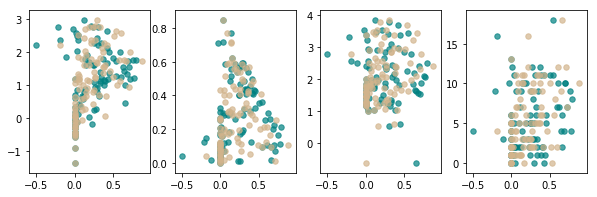

In [45]:
#plot all sa_variables against special clinical endpoint that distinguishes r from f
plt.figure(figsize=(10,3))
for v in range(len(short_varz_labels)):
    for iid in range(len(D)):

        tdf=sa_df[sa_df['dose']==D[iid]]

        x=np.array(tdf[sa_o[0]])*np.array(tdf[sa_o[4]])*np.array(tdf[sa_o[3]])
        y=np.array(tdf[sa_v[v]])

        x=x[~np.isnan(y)]
        y=y[~np.isnan(y)]

        ax=plt.subplot(141+v)
        ax.scatter(x,y,c=trialcolz[iid],s=30,alpha=0.7)
        #ax.set_xlim([np.min(xtickz[v]),np.max(xtickz[v])])

        #ax.set_xticks(xtickz[v])
            
        
    #ax.set_ylabel('special')

plt.savefig('figures/global/special.pdf',dpi=600)



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


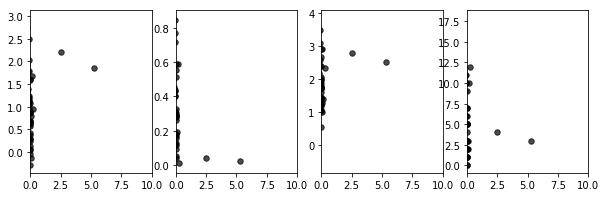

In [77]:
#plot all sa_variables against special clinical endpoint that distinguishes r from f
plt.figure(figsize=(10,3))
for v in range(len(short_varz_labels)):

    tdf=sa_df[sa_df['dose']==D[0]]
    oo1=np.array(tdf[sa_o])

    #s1=oo1[:,3]*oo1[:,4]**2
    
    vv=np.array(tdf[sa_v[v]]) #the value of the sa variable, that we want to infer

    tdf=sa_df[sa_df['dose']==D[1]]
    oo2=np.array(tdf[sa_o])
    
    #s2=oo[:,3]*oo[:,4]**2

    ss=oo2[:,4]**2*oo2[:,3]-oo1[:,4]**2/oo1[:,3] #subtract the metrics
    ss=((oo2[:,3]-oo1[:,3])/oo1[:,3])/((oo2[:,4]-oo1[:,4])/oo1[:,4]) #subtract, normalize, then make metric
    
    ax=plt.subplot(141+v)
    ax.set_xlim([0,10])
    ax.scatter(ss,vv,c='k',s=30,alpha=0.7)

plt.savefig('figures/global/special.pdf',dpi=600)



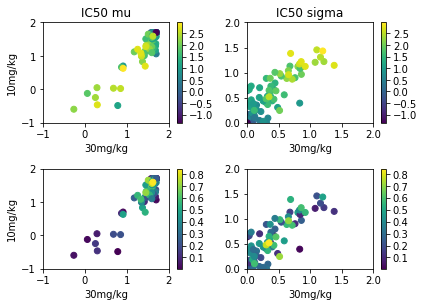

In [99]:
plt.figure(figsize=(6,8))
for v in [0,1]:
#for v in range(len(short_varz_labels)):

    tdf=sa_df[sa_df['dose']==D[0]]
    oo1=np.array(tdf[sa_o])

    #s1=oo1[:,3]*oo1[:,4]**2
    
    vv=np.array(tdf[sa_v[v]]) #the value of the sa variable, that we want to infer

    tdf=sa_df[sa_df['dose']==D[1]]
    oo2=np.array(tdf[sa_o])

    plt.subplot(421+v*2)
    plt.scatter(oo2[:,3],oo1[:,3],c=vv)
    plt.xlim([-1,2])
    plt.ylim([-1,2])
    if v==0:
        plt.title('IC50 mu')
    plt.xlabel('30mg/kg')
    plt.ylabel('10mg/kg')
    plt.colorbar()

    plt.subplot(422+v*2)
    plt.scatter(oo2[:,4],oo1[:,4],c=vv)
    plt.xlim([0,2])
    plt.ylim([0,2])
    if v==0:
        plt.title('IC50 sigma')
    plt.xlabel('30mg/kg')
    plt.colorbar()

plt.tight_layout()

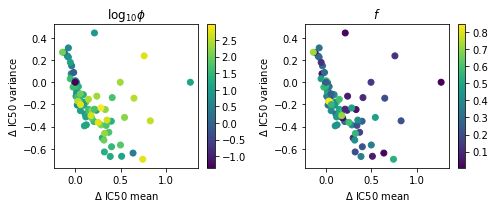

In [102]:
plt.figure(figsize=(7,3))
for v in [0,1]:
#for v in range(len(short_varz_labels)):

    tdf=sa_df[sa_df['dose']==D[0]]
    oo1=np.array(tdf[sa_o])

    #s1=oo1[:,3]*oo1[:,4]**2
    
    vv=np.array(tdf[sa_v[v]]) #the value of the sa variable, that we want to infer

    tdf=sa_df[sa_df['dose']==D[1]]
    oo2=np.array(tdf[sa_o])

    plt.subplot(121+v)
    plt.scatter(oo2[:,3]-oo1[:,3],oo2[:,4]-oo1[:,4],c=vv)
    #plt.xlim([-1,2])
    #plt.ylim([-1,2])
    plt.title(short_varz_labels[v])
    plt.xlabel('$\Delta$ IC50 mean')
    plt.ylabel('$\Delta$ IC50 variance')
    plt.colorbar()


plt.tight_layout()